 # **GaussianNB Classifier**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import RobustScaler
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Load training and testing data
x_train = pd.read_csv('/kaggle/input/uofg-mlh-2021-22-classification/X_train.csv', delimiter=',')
y_train = pd.read_csv('/kaggle/input/uofg-mlh-2021-22-classification/y_train.csv', delimiter=',').to_numpy()
x_test = pd.read_csv('/kaggle/input/uofg-mlh-2021-22-classification/X_test.csv', delimiter=',')

y_train = np.delete(y_train,0,axis=1).ravel()



/kaggle/input/uofg-mlh-2021-22-classification/X_test.csv
/kaggle/input/uofg-mlh-2021-22-classification/y_train.csv
/kaggle/input/uofg-mlh-2021-22-classification/X_train.csv
/kaggle/input/uofg-mlh-2021-22-classification/my_submission.csv
/kaggle/input/uofg-mlh-2021-22-classification/example_script.py


In [2]:
x_train = x_train.drop("Number.of.inner.objects..polygon.",axis=1)
x_test = x_test.drop("Number.of.inner.objects..polygon.",axis=1)

In [3]:
from sklearn.model_selection import train_test_split
sX_train, sX_test, sY_train, sY_test = train_test_split(x_train, y_train, test_size=0.2)


In [4]:
scaler = RobustScaler(quantile_range=(10.0, 90.0))
sX_train = scaler.fit_transform(sX_train)
sX_test = scaler.transform(sX_test)

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
classifier = GaussianNB()
gridSearch = GridSearchCV(classifier,param_grid = {'var_smoothing': np.logspace(0,-20, num=21)}, cv=10 )
gridSearch.fit(sX_train,sY_train)
print(gridSearch.best_params_)


y_pred = classifier.fit(sX_train, sY_train)
y_pred = classifier.predict(sX_test)

y_pred2 = gridSearch.fit(sX_train, sY_train)
y_pred2 = gridSearch.predict(sX_test)

{'var_smoothing': 0.0001}


In [6]:
from sklearn.metrics import classification_report, confusion_matrix
print("GaussianNB")
print(classification_report(sY_test,y_pred))
print(confusion_matrix(sY_test, y_pred))

print("GaussianNB with grid search")
print(classification_report(sY_test,y_pred2))
print(confusion_matrix(sY_test, y_pred2))


GaussianNB
              precision    recall  f1-score   support

           1       0.86      0.90      0.88        20
           2       0.89      0.85      0.87        20

    accuracy                           0.88        40
   macro avg       0.88      0.88      0.87        40
weighted avg       0.88      0.88      0.87        40

[[18  2]
 [ 3 17]]
GaussianNB with grid search
              precision    recall  f1-score   support

           1       0.90      0.90      0.90        20
           2       0.90      0.90      0.90        20

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.90      0.90      0.90        40

[[18  2]
 [ 2 18]]


# **K-NearestNeighbours classifier**

In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


from sklearn.model_selection import GridSearchCV


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Load training and testing data
nx_train = pd.read_csv('/kaggle/input/uofg-mlh-2021-22-classification/X_train.csv', delimiter=',')
ny_train = pd.read_csv('/kaggle/input/uofg-mlh-2021-22-classification/y_train.csv', delimiter=',').to_numpy()
nx_test = pd.read_csv('/kaggle/input/uofg-mlh-2021-22-classification/X_test.csv', delimiter=',')


ny_train = np.delete(ny_train,0,axis=1).ravel()

/kaggle/input/uofg-mlh-2021-22-classification/X_test.csv
/kaggle/input/uofg-mlh-2021-22-classification/y_train.csv
/kaggle/input/uofg-mlh-2021-22-classification/X_train.csv
/kaggle/input/uofg-mlh-2021-22-classification/my_submission.csv
/kaggle/input/uofg-mlh-2021-22-classification/example_script.py


In [8]:
from sklearn.model_selection import train_test_split
nsX_train, nsX_test, nsY_train, nsY_test = train_test_split(nx_train, ny_train, test_size=0.3)

In [9]:
from sklearn.preprocessing import StandardScaler
nscaler = StandardScaler()
nscaler.fit(nsX_train)
nsX_train = nscaler.fit_transform(nsX_train)
nsX_test = nscaler.transform(nsX_test)

In [10]:
nclassifier = KNeighborsClassifier(n_neighbors=5)
nclassifier.fit(nsX_train, nsY_train)

KNeighborsClassifier()

In [11]:

ngridSearch = GridSearchCV(nclassifier,param_grid = {'n_neighbors' : np.linspace(1, 50, 50,dtype=int)},cv=50)
ngridSearch.fit(nsX_train,nsY_train)
nypred2 =ngridSearch.predict(nsX_test)
print(ngridSearch.best_params_, gridSearch.best_score_)

#gridSearch = GridSearchCV(classifier,param_grid)
#gridSearch.fit(scaled_x_train,yTrain)
#print(gridSearch.best_params_)

{'n_neighbors': 3} 0.84375


In [12]:


ny_pred = nclassifier.predict(nsX_test)

# **Comparison**

**Confusion matrixes with heat maps**

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
print("KNN")
print(classification_report(nsY_test,ny_pred))
print(confusion_matrix(nsY_test, ny_pred))
mat1=confusion_matrix(nsY_test, ny_pred)
print("KNN-GridSearch")
print(classification_report(nsY_test,nypred2))
print(confusion_matrix(nsY_test, nypred2))
mat2=confusion_matrix(nsY_test, nypred2)
print("GaussianNB")
print(classification_report(sY_test,y_pred))
print(confusion_matrix(sY_test, y_pred))
mat3=confusion_matrix(sY_test, y_pred)
print("Grid Search GaussianNB")
print(classification_report(sY_test,y_pred2))
print(confusion_matrix(sY_test, y_pred2))
mat4=confusion_matrix(sY_test, y_pred2)


KNN
              precision    recall  f1-score   support

           1       0.96      0.87      0.92        31
           2       0.88      0.97      0.92        29

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60

[[27  4]
 [ 1 28]]
KNN-GridSearch
              precision    recall  f1-score   support

           1       0.93      0.84      0.88        31
           2       0.84      0.93      0.89        29

    accuracy                           0.88        60
   macro avg       0.89      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60

[[26  5]
 [ 2 27]]
GaussianNB
              precision    recall  f1-score   support

           1       0.86      0.90      0.88        20
           2       0.89      0.85      0.87        20

    accuracy                           0.88        40
   macro avg       0.88      0.88      0.87        40
weight

<AxesSubplot:>

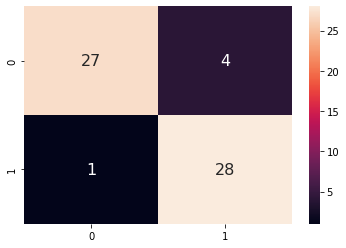

In [14]:
import seaborn as sn

sn.heatmap(mat1, annot=True, annot_kws={"size": 16})
    

<AxesSubplot:>

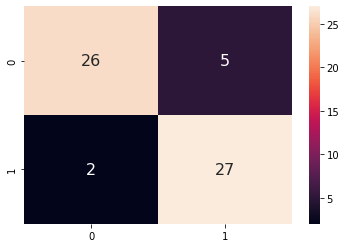

In [15]:
sn.heatmap(mat2, annot=True, annot_kws={"size": 16})

<AxesSubplot:>

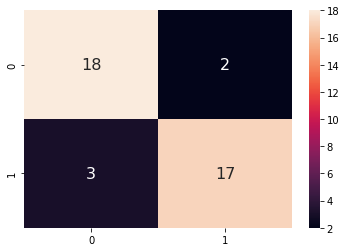

In [16]:
sn.heatmap(mat3, annot=True, annot_kws={"size": 16})

<AxesSubplot:>

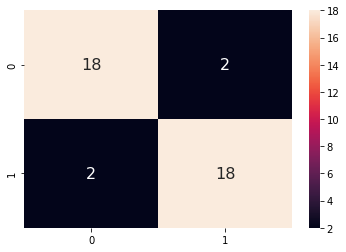

In [17]:
sn.heatmap(mat4, annot=True, annot_kws={"size": 16})

In [18]:

from sklearn.metrics import f1_score


tloss1=[]
tloss2=[]
tloss3=[]
tloss4=[]
for i in range(20):

    from sklearn.model_selection import train_test_split
    nsX_train, nsX_test, nsY_train, nsY_test = train_test_split(x_train, y_train, test_size=0.30)
    
    nscaler.fit(nsX_train)
    nsX_train = nscaler.fit_transform(nsX_train)
    nsX_test = nscaler.transform(nsX_test)

    from sklearn.model_selection import train_test_split
    sX_train, sX_test, sY_train, sY_test = train_test_split(x_train, y_train, test_size=0.3)
    
    scaler.fit(sX_train)
    sX_train = scaler.fit_transform(sX_train)
    sX_test = scaler.transform(sX_test)


    y_pred = classifier.fit(sX_train, sY_train)
    y_pred = classifier.predict(sX_test)
    loss1 = f1_score(sY_test, y_pred)
    tloss1.append(loss1)
    
    y_pred2 = gridSearch.fit(sX_train, sY_train)
    y_pred2 = gridSearch.predict(sX_test)
    loss2 = f1_score(sY_test, y_pred2)
    tloss2.append(loss2)

    ny_pred1 = nclassifier.fit(nsX_train, nsY_train)
    ny_pred1 = nclassifier.predict(nsX_test)
    loss3 = f1_score(nsY_test, ny_pred1)
    tloss3.append(loss3)

    ny_pred2 = ngridSearch.fit(nsX_train, nsY_train)
    ny_pred2 = ngridSearch.predict(nsX_test)
    loss4 = f1_score(nsY_test, ny_pred2)
    tloss4.append(loss4)


**GRAPH**

Below is the average Squared Loss of 20 runs of each classifer. The data is randomly distrubted between test and training each time with 30 percent being used to test and 70 percent used for training. 

Bars represent average Loss and error bars represent the standard deviation of each

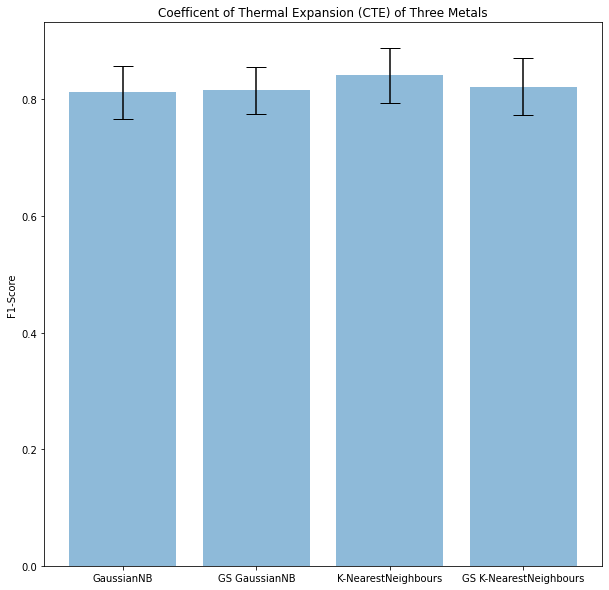

In [19]:

loss1=np.average(tloss1)
loss2=np.average(tloss2)
loss3=np.average(tloss3)
loss4=np.average(tloss4)

std1=np.std(tloss1)
std2=np.std(tloss2)
std3=np.std(tloss3)
std4=np.std(tloss4)

labels = ["GaussianNB","GS GaussianNB","K-NearestNeighbours","GS K-NearestNeighbours"]
x_pos = np.arange(len(labels))
losses = [loss1,loss2,loss3,loss4]
error = [std1,std2,std3,std4]
# Build the plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.bar(x_pos, losses, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('F1-Score')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Coefficent of Thermal Expansion (CTE) of Three Metals')


# Save the figure and show


plt.savefig('bar_plot_with_error_bars.png')
plt.show()





In [20]:
classifier = KNeighborsClassifier(algorithm='auto', leaf_size= 25, n_neighbors=4,p=1,weights='distance')
classifier.fit(nx_train,ny_train)
pred=classifier.predict(nx_test)

In [21]:
classifierSub = GaussianNB()
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(k=40)
scalerSubset = RobustScaler()

features = selector.fit_transform(x_train, y_train)
selected_x_train = scalerSubset.fit_transform(features)
features2 = selector.transform(x_test)
selected_test = scalerSubset.transform(features2)

#fy_pred = classifier.fit(scalerX_train, y_train)
#fy_pred = classifier.predict(scalerX_test)

classifierSub.fit(selected_x_train,y_train)
pred = classifierSub.predict(selected_test)

In [22]:
test_header = "Id,EpiOrStroma"
n_points = selected_test.shape[0]
y_pred_pp = np.ones((n_points, 2))
y_pred_pp[:, 0] = range(n_points)
y_pred_pp[:, 1] = pred


np.savetxt('submission.csv', y_pred_pp, fmt='%d', delimiter=",",
           header=test_header, comments="")